In [20]:
import pandas as pd
df = pd.read_csv('clean_data.csv')
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


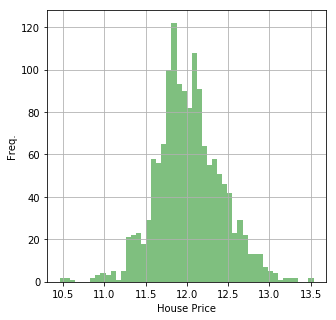

In [21]:
from matplotlib import pyplot as plt
import numpy as np

df['SalePrice'].apply(lambda x: np.log(x)).hist(bins=50, facecolor='green', alpha=0.5)
plt.xlabel('House Price')
plt.ylabel('Freq.')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [22]:
# Let's look a little more into feature engineering
from matplotlib import pyplot as plt
import seaborn as sns

# Plots the relationship between 2 variables and distinguishes between legendary or not
# Helps to see possible obvious clusters of legendaries
def plot_relationship(df, feature1, feature2):
    xplot = [df[feature1].min()], [df[feature1].max()]
    xplot = [df[feature2].min()], [df[feature2].max()]
    plt.scatter(df[feature1], df[feature2], 
                s=50, color='blue',label='Normal')
    plt.grid()
    plt.title('Pairwise Feature Relationship', fontsize=15)
    plt.xlabel(feature1, fontsize=20)
    plt.ylabel(feature2, fontsize=20)
    plt.legend()
    fig=plt.gcf()
    fig.set_size_inches(8, 8)
    plt.show()

In [23]:
df.corr()['SalePrice']

Id                      -0.021917
MSSubClass              -0.084284
LotFrontage              0.351651
LotArea                  0.263843
Alley                    0.139868
OverallQual              0.790982
OverallCond             -0.077856
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.472614
BsmtFinSF1               0.386420
BsmtFinSF2              -0.011378
BsmtUnfSF                0.214479
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
LowQualFinSF            -0.025606
GrLivArea                0.708624
BsmtFullBath             0.227122
BsmtHalfBath            -0.016844
FullBath                 0.560664
HalfBath                 0.284108
BedroomAbvGr             0.168213
KitchenAbvGr            -0.135907
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageYrBlt              0.261366
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF    

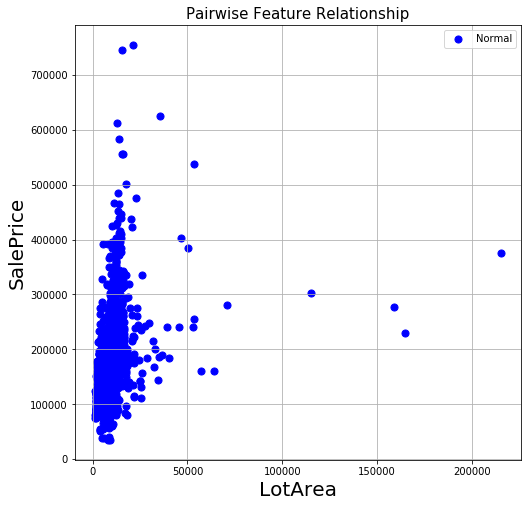

In [24]:
plot_relationship(df, 'LotArea', 'SalePrice')

In [25]:
df = df.drop(df[(df['LotArea'] > 100000)].index)

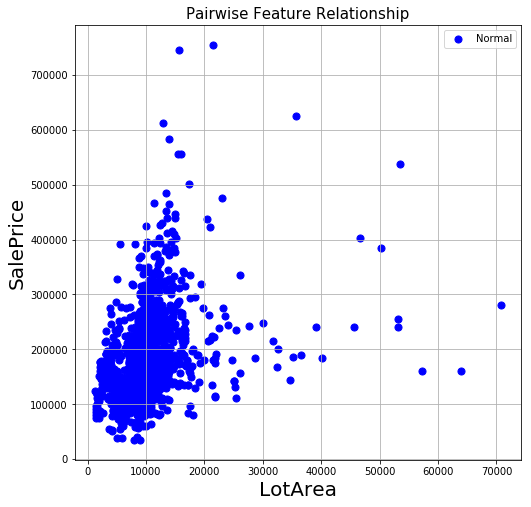

In [26]:
plot_relationship(df, 'LotArea', 'SalePrice')

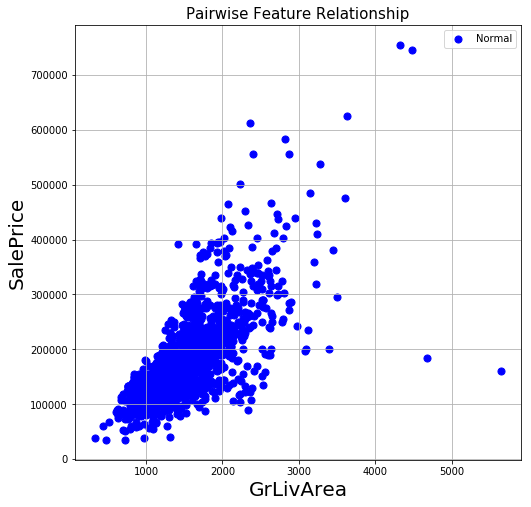

In [27]:
plot_relationship(df, 'GrLivArea', 'SalePrice')

In [28]:
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

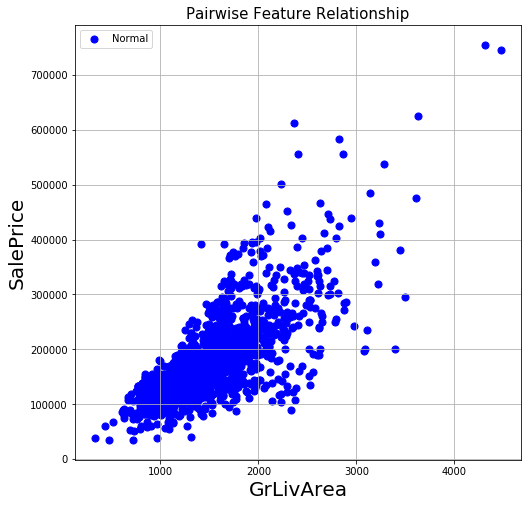

In [29]:
plot_relationship(df, 'GrLivArea', 'SalePrice')

In [30]:
df.corr()['SalePrice']

Id                      -0.018705
MSSubClass              -0.083696
LotFrontage              0.363071
LotArea                  0.371536
Alley                    0.139437
OverallQual              0.797555
OverallCond             -0.078095
YearBuilt                0.526294
YearRemodAdd             0.510409
MasVnrArea               0.478620
BsmtFinSF1               0.406005
BsmtFinSF2              -0.019403
BsmtUnfSF                0.217699
TotalBsmtSF              0.648730
1stFlrSF                 0.629085
2ndFlrSF                 0.323549
LowQualFinSF            -0.025235
GrLivArea                0.734710
BsmtFullBath             0.223945
BsmtHalfBath            -0.019579
FullBath                 0.561450
HalfBath                 0.288846
BedroomAbvGr             0.168624
KitchenAbvGr            -0.135585
TotRmsAbvGrd             0.539052
Fireplaces               0.465884
GarageYrBlt              0.261516
GarageCars               0.642124
GarageArea               0.630382
WoodDeckSF    

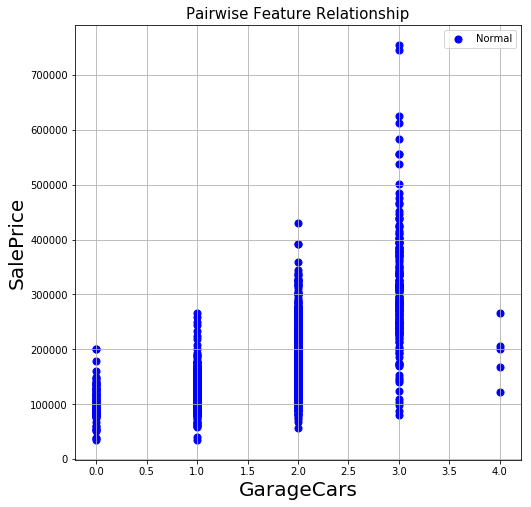

In [31]:
plot_relationship(df, 'GarageCars', 'SalePrice')

In [32]:
df['GarageCars'] = df['GarageCars'].replace(to_replace=4, value=0)

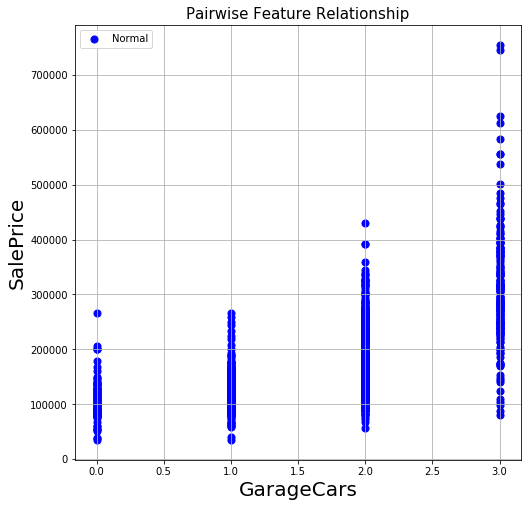

In [33]:
plot_relationship(df, 'GarageCars', 'SalePrice')

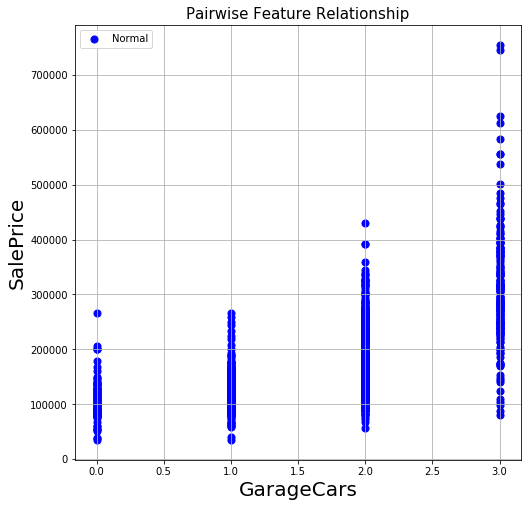

In [34]:
plot_relationship(df, 'GarageCars', 'SalePrice')

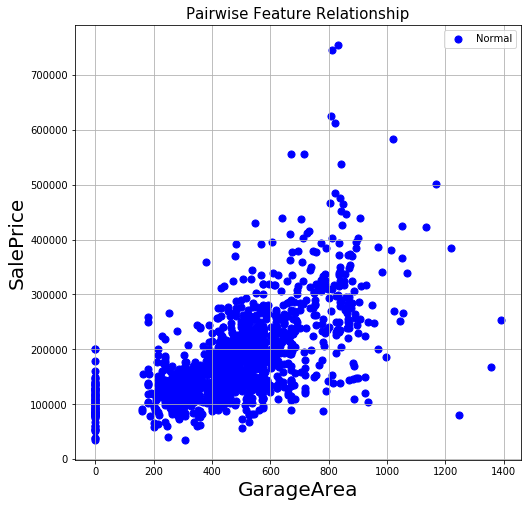

In [35]:
plot_relationship(df, 'GarageArea', 'SalePrice')

In [36]:
df['GarageArea'] = df['GarageArea'].replace(to_replace=0, value=400)

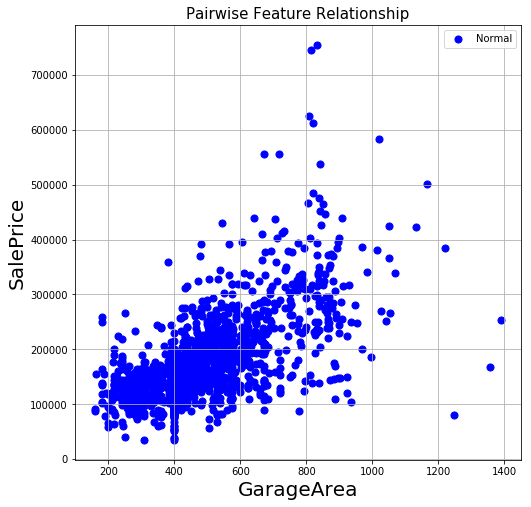

In [37]:
plot_relationship(df, 'GarageArea', 'SalePrice')

In [38]:
df.to_csv('cleaner_data.csv', index=False)